# import dependencies

In [2]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data
ENVIRONMENTAL JUSTICE - HOUSEHOLD ENERGY AND TRANSPORTATION BURDEN <br>
https://maps.nrel.gov/slope/data-viewer?filters=%5B%5D&layer=eej.household-energy-burden&year=2020&res=tracts <br>
Household Energy and Transportation Burden Data Description
Household energy and transportation burden data are combined from two sources. For housing energy burden, energy bills that consume more than 6% of a single household’s income are defined to constitute a high energy burden by the 2020 ACEEE Report How High Are Household Energy Burdens? Housing energy burdens of 6% or greater are binned into the highest energy burden bin. The low and medium bins are then divided equally across the remainder of the country. For transportation burden, three equal quantiles are mapped.

1. Housing energy burden data comes from the Low-income Energy Affordability Data (LEAD) Tool, developed by the U.S. Department of Energy and National Renewable Energy Laboratory

Energy burden is defined as the average annual housing energy costs divided by the average annual household income. Monthly housing energy costs are based on household monthly expenditures for electricity, gas (utility and bottled), and other fuels (including fuel oil, wood, etc.). For further data exploration visit the LEAD Tool.

2. Transportation energy burden data comes from the Affordability of Household Transportation Fuel Costs by Region and Socioeconomic Factors 2021 report, conducted by Argonne National Laboratory.

Transportation energy burden is defined as the percentage of annual household income spent on the household vehicle fuel costs (excludes public transit). Transportation burden is calculated for every census tract in the U.S. by combining three metrics (annual household vehicle miles traveled, stock-weighted miles per gallon, and fuel price) with tract-level income data. The Argonne study provides a finer understanding of the spatial variation in household transportation energy burden by connecting VMT, vehicle fuel economy, fuel costs, and income data at the census tract level.

In [3]:
burden_data_path = ".\data\household_energy_burden_baseline\household_energy_burden_baseline_tracts.csv"
df_burden = pd.read_csv(burden_data_path)
df_burden.head()

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
0,G01133965700,0.030750,0.0553
1,G01133965503,0.030264,0.0758
2,G01133965502,0.046644,0.0742
3,G01131035200,0.038904,0.0990
4,G01131035100,0.036439,0.0592


In [4]:
df_burden.shape

(73105, 3)

In [5]:
lead_data_path = ".\data\lead-tool-map-data.csv"
df_lead = pd.read_csv(lead_data_path)
df_lead.head()

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
0,48001950401,"Census Tract 9504.01, Anderson County, Texas",False,1.0,1083.0,81.0,76260.0,38.0,0.0,0.0,0.0,23.0,31.0,7.0,1.0,0.0,14.0,46.0,41.0
1,48001950402,"Census Tract 9504.02, Anderson County, Texas",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48001950901,"Census Tract 9509.01, Anderson County, Texas",True,3.0,1931.0,1789.0,56468.0,10.0,1.0,0.0,0.0,11.0,73.0,3.0,1.0,9.0,40.0,39.0,13.0
3,48001951100,"Census Tract 9511, Anderson County, Texas",False,3.0,1928.0,1841.0,68871.0,7.0,0.0,3.0,0.0,8.0,77.0,4.0,0.0,8.0,40.0,37.0,15.0
4,48009020200,"Census Tract 202, Archer County, Texas",False,3.0,2260.0,1024.0,65718.0,0.0,3.0,0.0,0.0,4.0,90.0,3.0,1.0,13.0,42.0,28.0,16.0


In [6]:
path_dfw = "../supervised_version/acs5_dfw_df.pkl"
with open(path_dfw, 'rb') as file:
    df_dfw = pkl.load(file)

In [7]:
df_dfw.head()

,tract,GEO_ID,NAME,state,county,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,...,B15003_016E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E
0,31328,1400000US48085031328,"Census Tract 313.28, Collin County, Texas",48,85,3949,2088,131,0,1698,...,67,103,83,203,168,142,951,365,63,15
1,113403,1400000US48439113403,"Census Tract 1134.03, Tarrant County, Texas",48,439,2926,2569,124,0,5,...,162,339,105,176,303,117,415,227,10,40
2,16415,1400000US48113016415,"Census Tract 164.15, Dallas County, Texas",48,113,4651,2228,1039,0,232,...,42,345,40,399,275,303,979,363,0,66
3,113936,1400000US48439113936,"Census Tract 1139.36, Tarrant County, Texas",48,439,5468,3757,616,0,141,...,120,512,96,217,503,242,1153,593,101,86
4,17201,1400000US48113017201,"Census Tract 172.01, Dallas County, Texas",48,113,5936,3235,967,299,26,...,133,681,199,216,168,289,84,18,14,0


In [8]:
df_dfw.GEO_ID.shape, df_burden["Geography ID"].shape, df_lead["Geography ID"].shape

((1704,), (73105,), (1911,))

In [9]:
dfw_geo_id = df_dfw["GEO_ID"].apply(lambda s: s.split("US")[1]).tolist()
len(dfw_geo_id), len(dfw_geo_id[0])

(1704, 11)

In [10]:
df_burden["Geography ID"] = df_burden["Geography ID"].apply(lambda s: s.split("G")[-1])

In [11]:
df_burden["Geography ID"]

0        01133965700
1        01133965503
2        01133965502
3        01131035200
4        01131035100
            ...     
73100    56025001800
73101    56025000502
73102    56023978400
73103    56029965200
73104    56029965400
Name: Geography ID, Length: 73105, dtype: object

In [12]:
df_burden[df_burden["Geography ID"].str.startswith("48")]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61800,48507950302,0.037378,0.0538
61801,48507950301,0.042217,0.0521
61802,48507950200,0.029819,0.0609
61803,48505950301,0.055094,0.0551
61804,48503950500,0.041173,0.0517
...,...,...,...
67009,48329001300,0.040684,0.0256
67010,48029181815,0.015419,0.0167
67011,48329001400,0.056198,0.0436
67012,48329001500,0.031764,0.0422


In [13]:
df_burden[df_burden["Geography ID"].isin(dfw_geo_id)]

,Geography ID,Transportation Burden Pct Income,Energy Burden Pct Income
61813,48497150603,0.042354,0.0320
61843,48497150101,0.029340,0.0282
61846,48497150500,0.029252,0.0366
62132,48439123500,0.051681,0.0592
62134,48439123200,0.026472,0.0198
...,...,...,...
66965,48257051202,0.027259,0.0339
66985,48085030510,0.017308,0.0183
66988,48439106201,0.036127,0.0495
66999,48113013619,0.018819,0.0151


In [14]:
df_lead["Geography ID"] = df_lead["Geography ID"].astype(str)

In [15]:
df_lead_dfw= df_lead[df_lead["Geography ID"].isin(dfw_geo_id)]
df_lead_dfw

,Geography ID,Name,Is Disadvantaged Community?,Energy Burden (% income),Avg. Annual Energy Cost ($),Total Households,Household Income,Black/ African American (% pop.),American Indian/ Native Alaskan (% pop.),Asian (% pop.),Native Hawaiian/ Other Pacific Islander (% pop.),White Hispanic or Latino (% pop.),White Non-Hispanic or Latino (% pop.),Two or More Races (% pop.),Other Races (% pop.),Less Than High School (% pop.),High School (% pop.),Associates or Some College (% pop.),Bachelors or Higher (% pop.)
16,48085030101,"Census Tract 301.01, Collin County, Texas",True,3.0,2508.0,750.0,88111.0,0.0,0.0,0.0,0.0,25.0,65.0,3.0,6.0,20.0,36.0,36.0,9.0
17,48085030102,"Census Tract 301.02, Collin County, Texas",True,3.0,2578.0,1011.0,89600.0,0.0,1.0,2.0,0.0,22.0,69.0,3.0,4.0,15.0,25.0,35.0,25.0
18,48085030201,"Census Tract 302.01, Collin County, Texas",False,2.0,2670.0,1154.0,126297.0,4.0,0.0,4.0,0.0,11.0,77.0,4.0,0.0,4.0,25.0,27.0,44.0
19,48085030202,"Census Tract 302.02, Collin County, Texas",False,2.0,2560.0,1186.0,161727.0,1.0,3.0,5.0,0.0,16.0,72.0,2.0,1.0,2.0,22.0,29.0,47.0
20,48085030204,"Census Tract 302.04, Collin County, Texas",False,2.0,2032.0,2354.0,103099.0,15.0,0.0,1.0,0.0,12.0,63.0,7.0,2.0,10.0,21.0,12.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,48497150603,"Census Tract 1506.03, Wise County, Texas",False,3.0,1984.0,1488.0,79149.0,3.0,1.0,1.0,0.0,15.0,73.0,5.0,2.0,20.0,31.0,34.0,15.0
1902,48497150604,"Census Tract 1506.04, Wise County, Texas",False,2.0,2002.0,1404.0,89676.0,0.0,0.0,1.0,0.0,8.0,91.0,0.0,0.0,16.0,29.0,40.0,15.0
1903,48497150605,"Census Tract 1506.05, Wise County, Texas",False,3.0,1970.0,1786.0,76372.0,0.0,0.0,0.0,0.0,7.0,86.0,4.0,3.0,14.0,44.0,26.0,15.0
1904,48497150606,"Census Tract 1506.06, Wise County, Texas",False,2.0,2021.0,873.0,90187.0,4.0,0.0,0.0,0.0,13.0,81.0,2.0,1.0,13.0,34.0,33.0,20.0


In [16]:
df_lead_dfw.isna().sum()

Geography ID                                        0
Name                                                0
Is Disadvantaged Community?                         0
Energy Burden (% income)                            6
Avg. Annual Energy Cost ($)                         6
Total Households                                    6
Household Income                                    6
Black/ African American (% pop.)                    6
American Indian/ Native Alaskan (% pop.)            6
Asian (% pop.)                                      6
Native Hawaiian/ Other Pacific Islander (% pop.)    6
White Hispanic or Latino (% pop.)                   6
White Non-Hispanic or Latino (% pop.)               6
Two or More Races (% pop.)                          6
Other Races (% pop.)                                6
Less Than High School (% pop.)                      6
High School (% pop.)                                6
Associates or Some College (% pop.)                 6
Bachelors or Higher (% pop.)

In [17]:
df_lead_dfw = df_lead_dfw.dropna()

# classfication

## Logistic Regression

Best Hyperparameters: {'C': 0.01, 'max_iter': 1000}
LR GridSearchCV model saved successfully as: LR_grid_search_model.pkl

Confusion Matrix:
[[352  24]
 [ 52  82]]


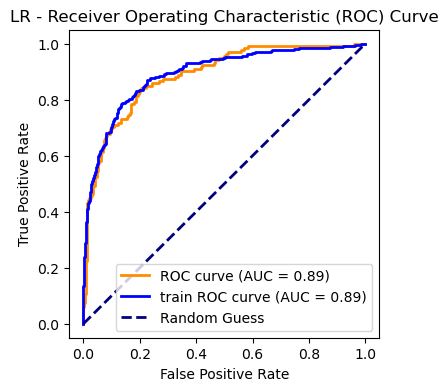

AUC: 0.89
train AUC: 0.89
Test Accuracy: 0.85
Train Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       376
           1       0.77      0.61      0.68       134

    accuracy                           0.85       510
   macro avg       0.82      0.77      0.79       510
weighted avg       0.85      0.85      0.84       510



In [20]:
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Define hyperparameter grids for the model ： C -Inverse of regularization strength
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [1000]}

# Train the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)  

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Save the model to disk using pickle
model_file_path = 'LR_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("LR GridSearchCV model saved successfully as:", model_file_path)


# Predictions on the test set
y_pred = grid_search.predict(X_test_scaled)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#
# Calculate the probability scores for ROC curve
y_prob = grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

######
#train AUC
# Calculate the probability scores for ROC curve
y_prob_train = grid_search.predict_proba(X_train_scaled)[:, 1]
# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("LR_ROC.png")
plt.show()


# Print AUC
print('AUC: {:.2f}'.format(roc_auc))
print('train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)


# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)

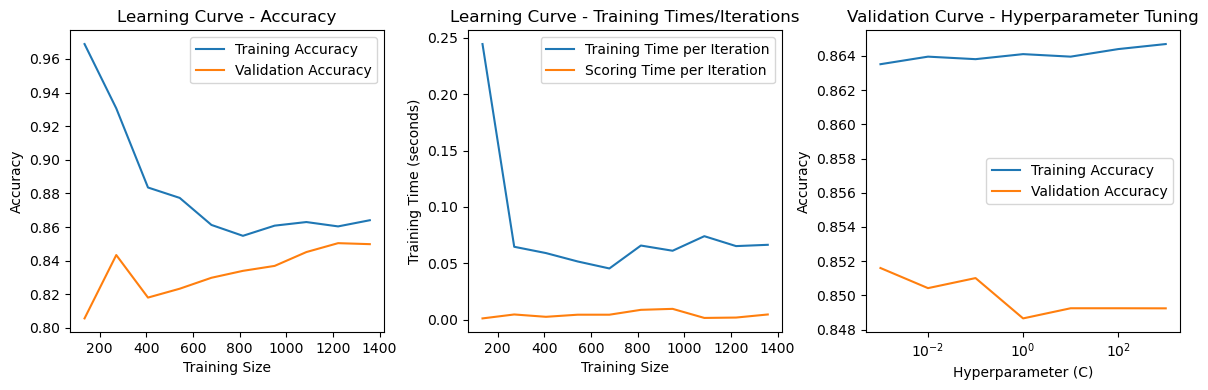

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Set up logistic regression model
model = LogisticRegression(max_iter=1000)

# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Learning curve for training time
plt.subplot(1, 3, 2)
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()



# Validation curve: Varying hyperparameter (e.g., C for Logistic Regression)
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='C', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for hyperparameter tuning
plt.subplot(1, 3, 3)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Hyperparameter (C)')
plt.ylabel('Accuracy')
plt.title('Validation Curve - Hyperparameter Tuning')
plt.legend()

plt.tight_layout()
plt.savefig('LR_curves.png')
plt.show()


C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

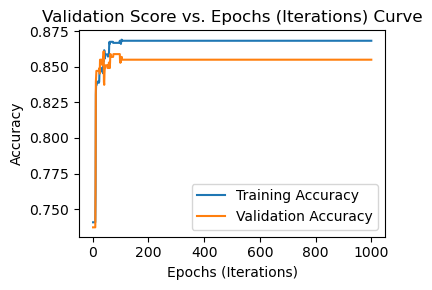

In [19]:
#from sklearn.model_selection import cross_val_score
# Epochs (Iterations) tracking during training
max_epochs = 1000  # Adjust this based on your model and convergence
epochs = []
train_scores_epochs = []
test_scores_epochs = []


X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model and track the scores
for epoch in range(1, max_epochs + 1):
    model = LogisticRegression(max_iter=epoch)
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    epochs.append(epoch)
    
    train_scores_epochs.append(model.score(X_train, y_train))  # Fix: Use X_train, not y_train
    test_scores_epochs.append(model.score(X_test, y_test))  # Fix: Use X_test, not y_test

# Plot Training Score vs. Epochs (Iterations) Curve and Validation Score vs. Epochs (Iterations) Curve
plt.figure(figsize=(4, 3))

# Training Score vs. Epochs (Iterations) Curve
plt.subplot()
plt.plot(epochs, train_scores_epochs, label='Training Accuracy')
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Accuracy')
plt.title('Training Score vs. Epochs (Iterations) Curve')
plt.legend()

# Validation Score vs. Epochs (Iterations) Curve
plt.plot(epochs, test_scores_epochs, label='Validation Accuracy')
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Accuracy')
plt.title('Validation Score vs. Epochs (Iterations) Curve')
plt.legend()

plt.tight_layout()
plt.savefig('LR_echo_curves.png')
plt.show()


## Decision Tree

https://www.youtube.com/watch?v=D0efHEJsfHo <br>
Decision Tree is not a iterative algorithm. DTs use a criterion to find the best splits during the tree-building process. The choice of criterion depends on whether the problem is a classification or regression task.

### Learning and Validation Curves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

# Set up 
model = DecisionTreeClassifier()

# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)


# Learning curve for accuracy
plt.figure(figsize=(8,16))
plt.subplot(4, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Learning curve for training time
plt.subplot(4, 2, 2)
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()


# Validation curve: max_depth tuning (e.g., C for Logistic Regression)
param_range = [2, 3, 5, 7, 10,20,30]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for max_depth tuning
plt.subplot(4, 2, 3)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve - max_depth Tuning')
plt.legend()

# Validation curve: max_features tuning (e.g., C for Logistic Regression)
param_range = [2, 3, 5, 7, 9,12,16]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='max_features', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for max_features tuning
plt.subplot(4, 2, 4)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Validation Curve - max_features Tuning')
plt.legend()


# Validation curve: ccp_alpha
param_range = [0, 0.001,0.005, 0.01,0.05,0.1,0.25,0.5,0.7,0.9]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='ccp_alpha', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(4, 2, 5)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Validation Curve - ccp_alpha Tuning')
plt.legend()

# Validation curve: min_samples_split
param_range = [2,3,5,10,20,30,40,50,60,70,80,90,100,120,140,160,200,240,280,320,400]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='min_samples_split', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(4, 2, 6)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Validation Curve - min_samples_split Tuning')
plt.legend()

# Validation curve: min_samples_leaf
param_range = [2,3,5,10,20,30,50,80,100,120,140,160,180,200,250,300]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='min_samples_leaf', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(4, 2, 7)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Validation Curve - min_samples_leaf Tuning')
plt.legend()


# Validation curve: criterion
param_range = ['gini', 'entropy', 'log_loss']
train_scores, test_scores = validation_curve(
    model, features, target, param_name='criterion', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(4, 2, 8)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
#plt.xscale('categ')
plt.xlabel('criterion')
plt.ylabel('Accuracy')
plt.title('Validation Curve - criterion Tuning')
plt.legend()



plt.tight_layout()
plt.savefig('DT_curves.png')
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

### Gridsearch

Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'log_loss', 'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 160, 'min_samples_split': 250, 'splitter': 'best'}
DT GridSearchCV model saved successfully as: dt_grid_search_model.pkl

Confusion Matrix:
[[357  19]
 [ 71  63]]


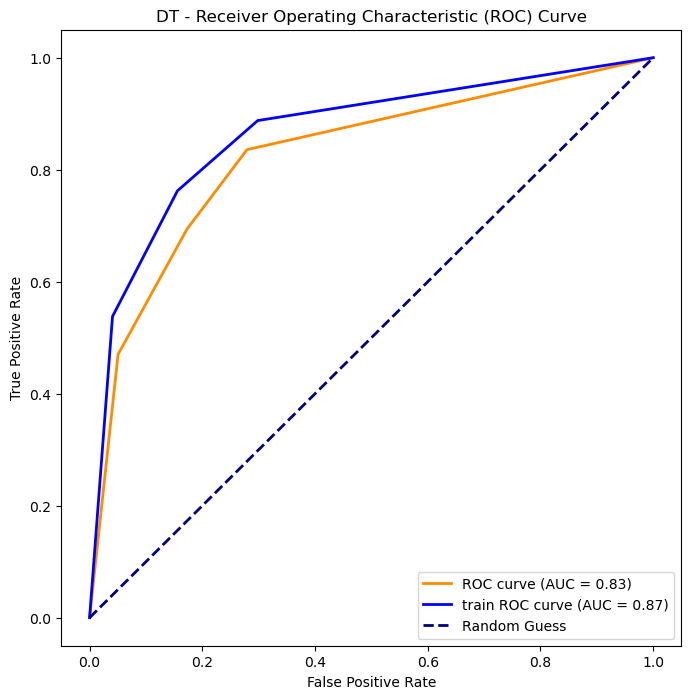

AUC: 0.83
train AUC: 0.87
Test Accuracy: 0.82
Train Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       376
           1       0.77      0.47      0.58       134

    accuracy                           0.82       510
   macro avg       0.80      0.71      0.74       510
weighted avg       0.82      0.82      0.81       510



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report

# Initialize the Logistic Regression model
model = DecisionTreeClassifier()

# Define hyperparameter grids for the model ： 
param_grid = {'criterion':['gini', 'entropy','log_loss'], 
              'splitter':['best', 'random'],
              'max_depth': [2, 3, 5, 7, None], 
              'min_samples_split': [230,240,250,260,270], 
              'min_samples_leaf': [160,170,180,190,200],
              'ccp_alpha': [0, 0.001,0.05, 0.01, 0.1],
              'max_features': [None,7,8,9,10, 'sqrt', 'log2']
             }

# Train the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Save the model to disk using pickle
model_file_path = 'dt_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("DT GridSearchCV model saved successfully as:", model_file_path)



# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#
# Calculate the probability scores for ROC curve
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

######
#train AUC
# Calculate the probability scores for ROC curve
y_prob_train = grid_search.predict_proba(X_train)[:, 1]
# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)


# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("DT_ROC.png")
plt.show()


# Print AUC
print('AUC: {:.2f}'.format(roc_auc))
print('train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)

### learning and validation curves for best model

## Adaboost
RF is bagging, bootstrap <br>
adaboost and XGBosst are boosted

In [20]:
# Assuming 'disadvantaged community' is the target column and other columns are features
features = df_lead_dfw.drop(['Geography ID', 'Name', 'Is Disadvantaged Community?'], axis=1)
target = df_lead_dfw['Is Disadvantaged Community?']

# Convert 'True' and 'False' to 1 and 0
target = target.astype(int)

### Learning and Validation Curves

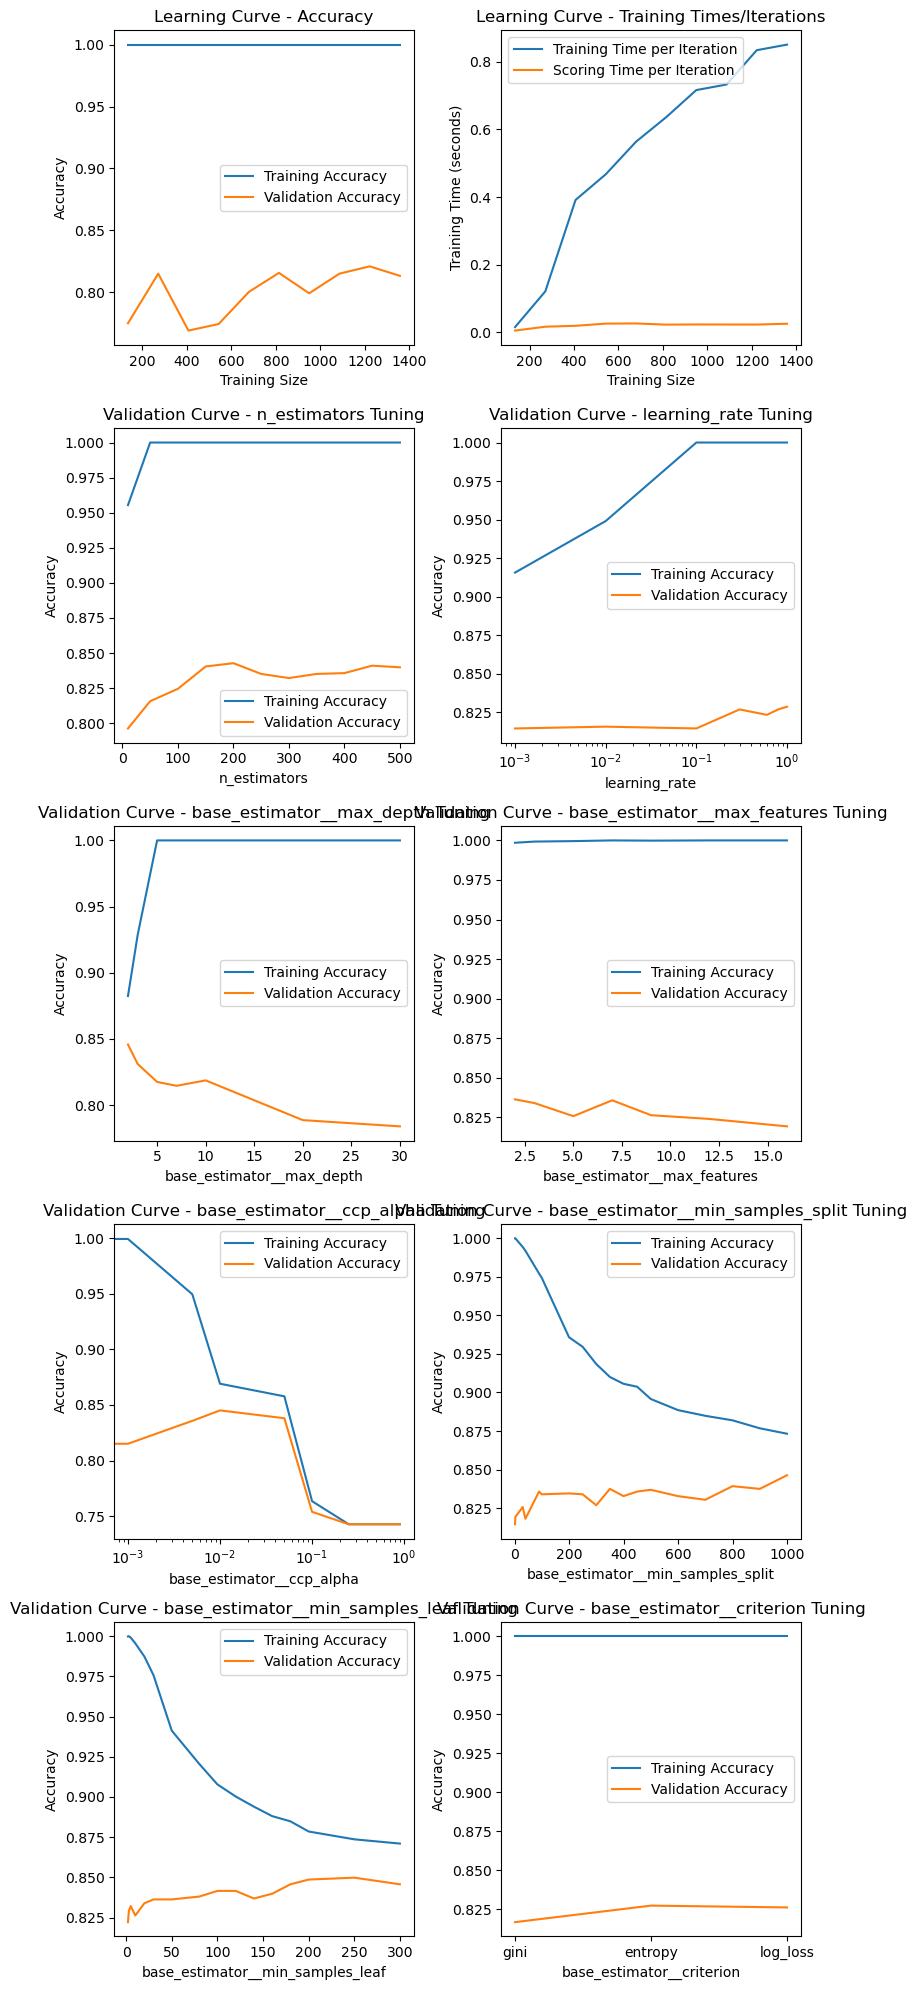

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

# Set up AdaBoostClassifier with DecisionTree base learners
base_learner = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
model = AdaBoostClassifier(base_estimator=base_learner, n_estimators=50, learning_rate=0.1)


# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)

# Learning curve for accuracy
plt.figure(figsize=(8,20))
plt.subplot(5, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()

# Learning curve for training time
plt.subplot(5, 2, 2)
plt.plot(train_sizes, np.mean(fit_times, axis=1), label='Training Time per Iteration')
plt.plot(train_sizes, np.mean(score_times, axis=1), label='Scoring Time per Iteration')
plt.xlabel('Training Size')
plt.ylabel('Training Time (seconds)')
plt.title('Learning Curve - Training Times/Iterations')
plt.legend()

# Validation curve: n_estimators
param_range = [10,50,100,150,200,250,300,350,400,450,500]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='n_estimators', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)
# Plot validation curve for n_estimators
plt.subplot(5, 2, 3)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve - n_estimators Tuning')
plt.legend()

# Validation curve: learning_rate
param_range = [0.001,0.01,0.1,0.3,0.6,0.8,1]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='learning_rate', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve 
plt.subplot(5, 2, 4)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Validation Curve - learning_rate Tuning')
plt.legend()

# Validation curve: max_depth tuning (e.g., C for Logistic Regression)
param_range = [2, 3, 5, 7, 10,20,30]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__max_depth', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for max_depth tuning
plt.subplot(5, 2, 5)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('base_estimator__max_depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__max_depth Tuning')
plt.legend()

# Validation curve: max_features tuning (e.g., C for Logistic Regression)
param_range = [2, 3, 5, 7, 9,12,16]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__max_features', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve for max_features tuning
plt.subplot(5, 2, 6)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('base_estimator__max_features')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__max_features Tuning')
plt.legend()




# Validation curve: base_estimator__ccp_alpha
param_range = [0, 0.001,0.005, 0.01,0.05,0.1,0.25,0.5,0.7,0.9]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__ccp_alpha', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(5, 2, 7)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('base_estimator__ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__ccp_alpha Tuning')
plt.legend()

# Validation curve: base_estimator__min_samples_split
param_range = [2,3,30,40,90,100,200,250,300,350,400,450,500,600,700,800,900,1000]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__min_samples_split', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(5, 2, 8)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('base_estimator__min_samples_split')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__min_samples_split Tuning')
plt.legend()

# Validation curve: base_estimator__min_samples_leaf
param_range = [2,3,5,10,20,30,50,80,100,120,140,160,180,200,250,300]
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__min_samples_leaf', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(5, 2, 9)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xscale('linear')
plt.xlabel('base_estimator__min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__min_samples_leaf Tuning')
plt.legend()


# Validation curve: base_estimator__criterion
param_range = ['gini', 'entropy', 'log_loss']
train_scores, test_scores = validation_curve(
    model, features, target, param_name='base_estimator__criterion', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Plot validation curve
plt.subplot(5, 2, 10)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
#plt.xscale('categ')
plt.xlabel('base_estimator__criterion')
plt.ylabel('Accuracy')
plt.title('Validation Curve - base_estimator__criterion Tuning')
plt.legend()



plt.tight_layout()
plt.savefig('AdaBoost_curves.png')
plt.show()

### Gridsearch + classification report

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
# Set up AdaBoostClassifier with DecisionTree base learners
base_learner = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
model = AdaBoostClassifier(base_estimator=base_learner, n_estimators=50, learning_rate=0.1)


# Learning curve: Varying training sizes
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model, features, target, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1, return_times=True
)


Best Hyperparameters: {'base_estimator__ccp_alpha': 0, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': 2, 'base_estimator__min_samples_leaf': 300, 'base_estimator__min_samples_split': 1000, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 300}

C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lzowe\anaconda3\envs\SMU_cluster_analysis\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_est

Best Hyperparameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': 2, 'base_estimator__min_samples_leaf': 150, 'base_estimator__splitter': 'best', 'learning_rate': 0.05, 'n_estimators': 500}
AdaBoost GridSearchCV model saved successfully as: adaboost_grid_search_model.pkl

Confusion Matrix:
[[349  27]
 [ 45  89]]


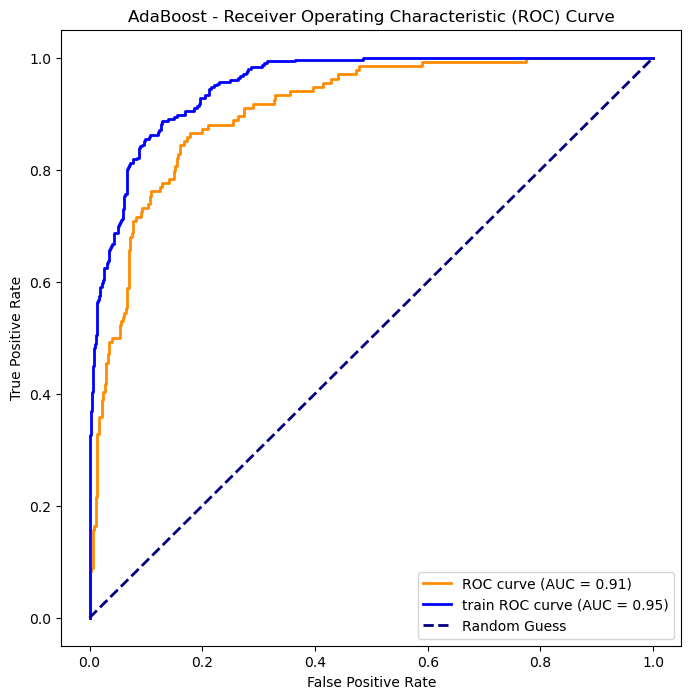

test AUC: 0.91
train AUC: 0.95
Test Accuracy:  0.86
Train Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       376
           1       0.77      0.66      0.71       134

    accuracy                           0.86       510
   macro avg       0.83      0.80      0.81       510
weighted avg       0.85      0.86      0.86       510



In [74]:
# Define hyperparameter grids for the model ： 
param_grid = {'base_estimator__criterion':['gini', 'entropy'], 
              'base_estimator__splitter':['best'],
              'base_estimator__max_depth': [ 2,5], 
              'base_estimator__min_samples_leaf': [150,200,300,500],
              'base_estimator__max_features': [2,6],
              'learning_rate':[0.01,0.05,0.5],
              'n_estimators':[50,300,500]
             }

# Train the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Save the model to disk using pickle
model_file_path = 'adaboost_grid_search_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(grid_search, file)
print("AdaBoost GridSearchCV model saved successfully as:", model_file_path)



# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#
# Calculate the probability scores for ROC curve
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

######
#train AUC
# Calculate the probability scores for ROC curve
y_prob_train = grid_search.predict_proba(X_train)[:, 1]
# Calculate ROC cur
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)



# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("AdaBoost_ROC.png")
plt.show()


# Print AUC
print('test AUC: {:.2f}'.format(roc_auc))
print('train AUC: {:.2f}'.format(roc_auc_train))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)


# Classification Report
classification_report_result = classification_report(y_test, y_pred)

# Print results
print(f'Test Accuracy:  {accuracy:.2f}')
print(f'Train Accuracy: {accuracy_train:.2f}')
print('Classification Report:\n', classification_report_result)

### Done